Data Visualization of Bird Strikes between 2000 – 2011

In [72]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Loading the dataset

bds_data = pd.read_csv("Bird Strikes data.xlsx - Bird Strikes.csv")
bds_df = pd.DataFrame(bds_data)

# Display the first five rows of the data
bds_df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


Visualizations and Analysis

Number of Bird Strikes Over the Years

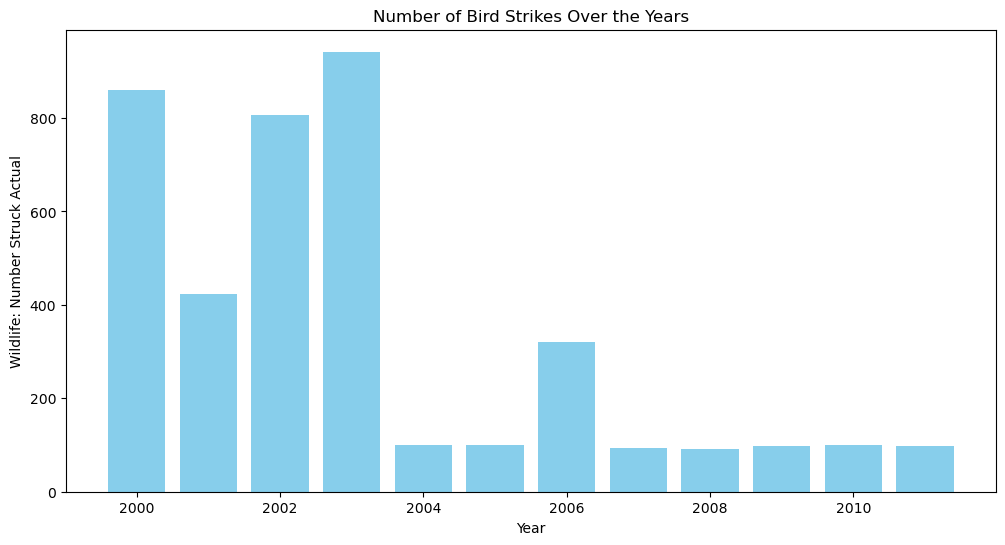

In [98]:
# Convert 'FlightDate' to datetime and extract the year
bds_df['FlightDate'] = pd.to_datetime(bds_df['FlightDate'], format='%Y-%m-%d', errors='coerce')
bds_df['Year'] = bds_df['FlightDate'].dt.year

plt.figure(figsize=(12, 6))
plt.bar(bds_df['Year'], bds_df['Wildlife: Number Struck Actual'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Wildlife: Number Struck Actual')
plt.title('Number of Bird Strikes Over the Years')
plt.show()

Yearly Bird Strikes in the US (Excluding Non-U.S. States)

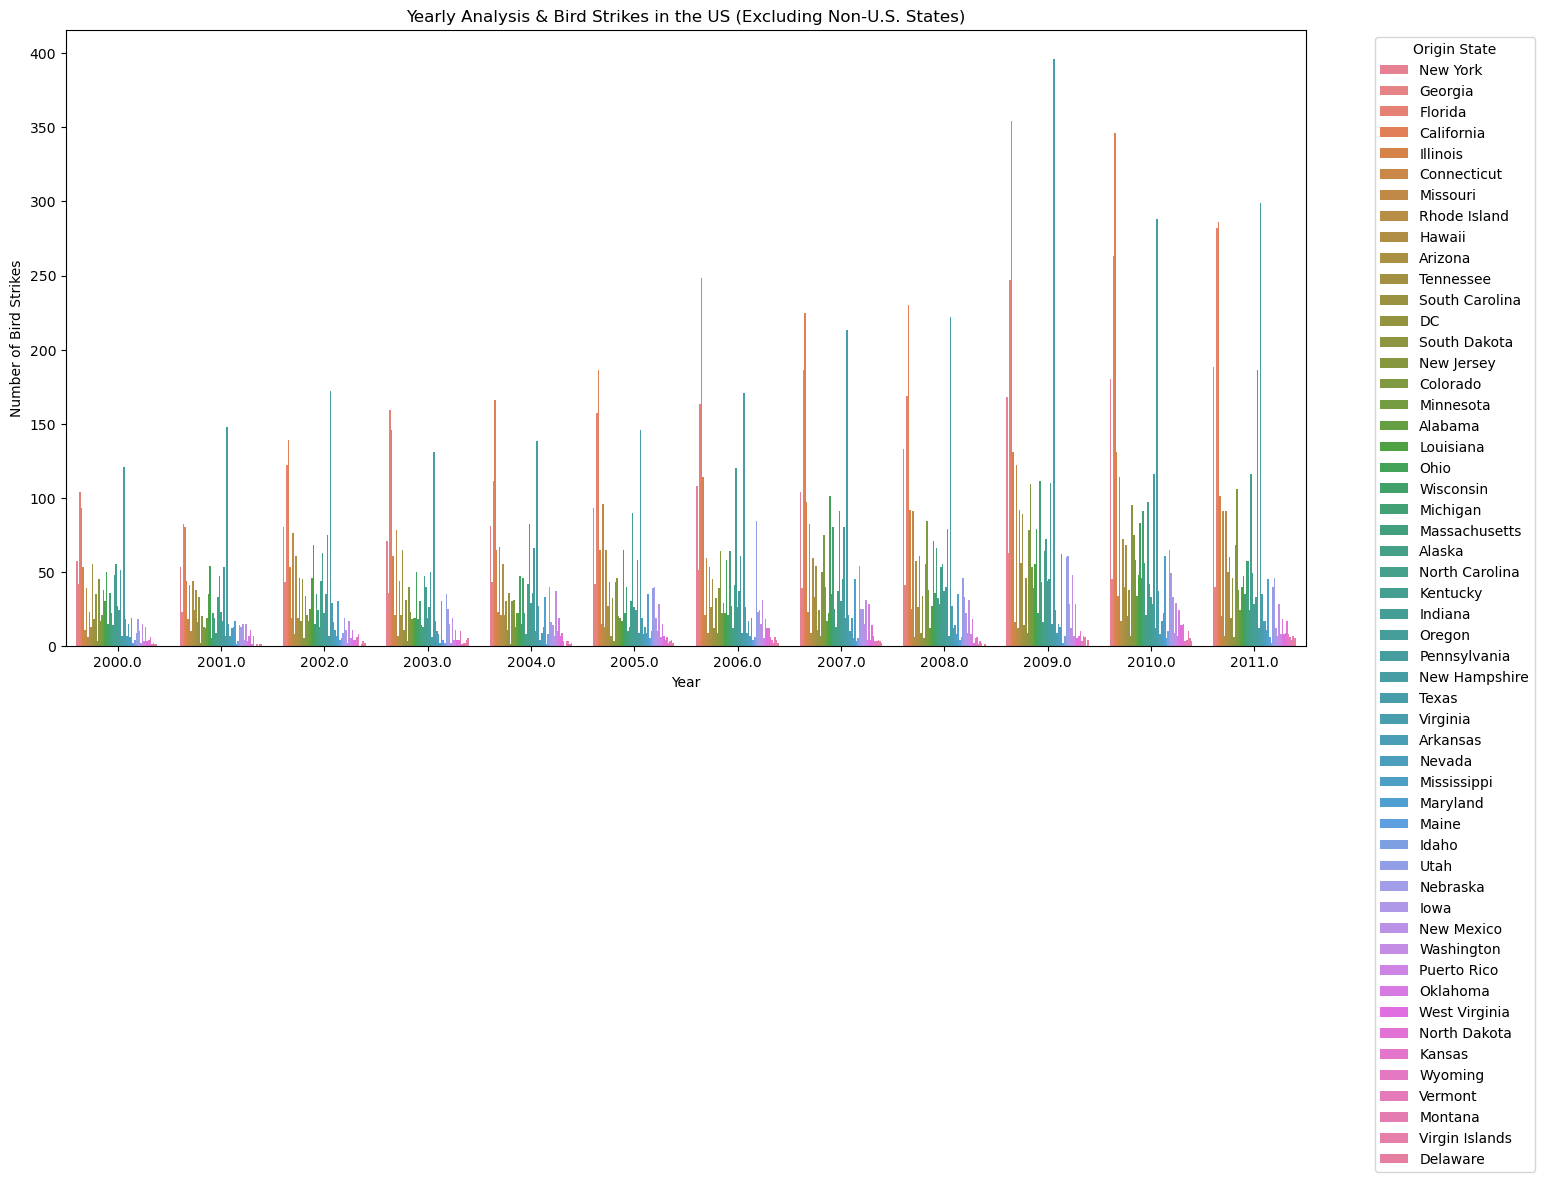

In [101]:
bds_df['FlightDate'] = pd.to_datetime(bds_df['FlightDate'], 
                                      format='%Y-%m-%d',
                                      errors='coerce')
bds_df['Year'] = bds_df['FlightDate'].dt.year

# List of non-U.S. states and territories to exclude
non_us_states = ['Quebec', 'British Columbia', 'Prince Edward Island', 
                 'Ontario', 'Newfoundland and Labrador', 'Alberta', 
                 'Saskatchewan']

# Filter rows where 'Origin State' is not in the non-U.S. states list
bds_df_us = bds_df[~bds_df['Origin State'].isin(non_us_states)]  

# Plot: Yearly Analysis & Bird Strikes in the US (Excluding Non-U.S. States)
plt.figure(figsize=(16, 8))
sns.countplot(x='Year', hue='Origin State', data=bds_df_us)
plt.title('Yearly Analysis & Bird Strikes in the US (Excluding Non-U.S. States)')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.legend(title='Origin State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Top 10 US Airlines in terms of having encountered bird strikes

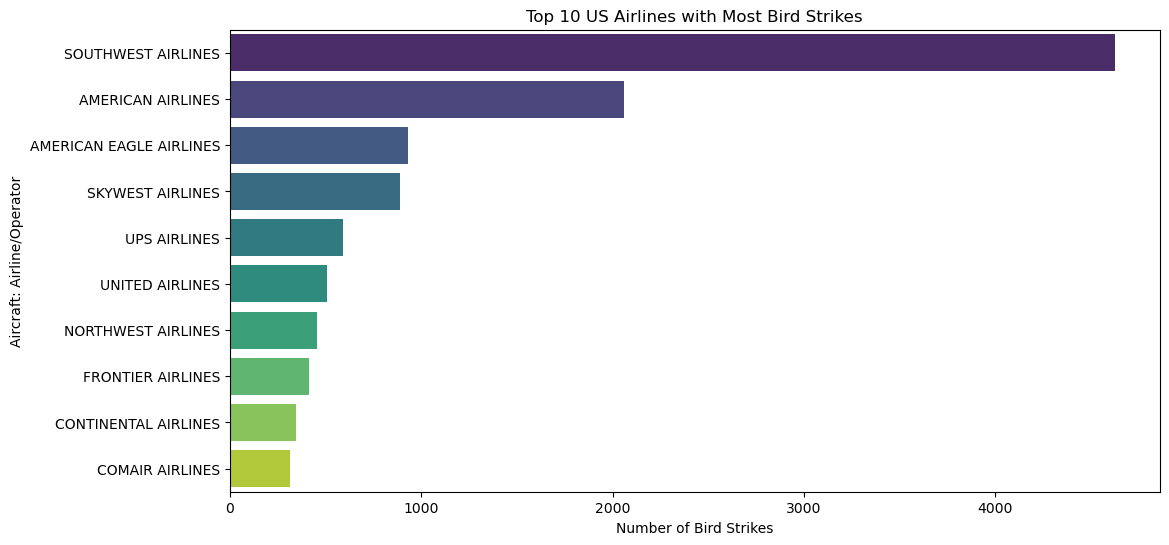

In [104]:
# Filter airlines with valid names containing 'AIRLINES'
bds_df_us_airlines = bds_df[
    bds_df['Aircraft: Airline/Operator'].notna() & 
    bds_df['Aircraft: Airline/Operator'].str.contains('AIRLINES', case=False)
]

# Plot the top 10 U.S. airlines with the most bird strikes
plt.figure(figsize=(12, 6))
top_airlines = bds_df_us_airlines['Aircraft: Airline/Operator'].value_counts().nlargest(10)
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis', hue=top_airlines.index, dodge=False, legend=False)
plt.title('Top 10 US Airlines with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Aircraft: Airline/Operator')
plt.show()

Top 50 Airports with Most Bird Strikes

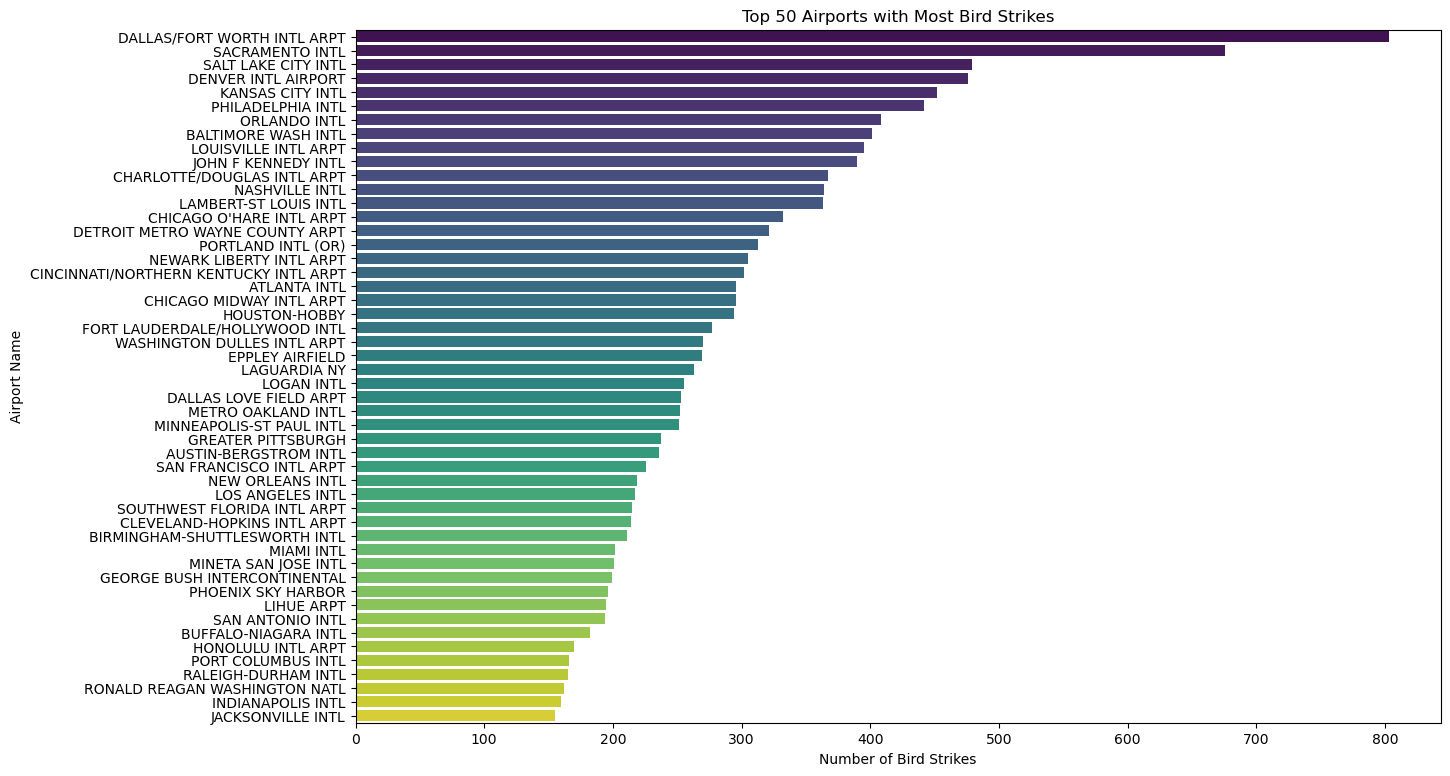

In [107]:
top_airports = bds_df['Airport: Name'].value_counts().nlargest(50)

plt.figure(figsize=(14, 9))
sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis', hue=top_airports.index, dodge=False, legend = False)
plt.title('Top 50 Airports with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport Name')
plt.show()

Yearly Cost Incurred due to Bird Strikes

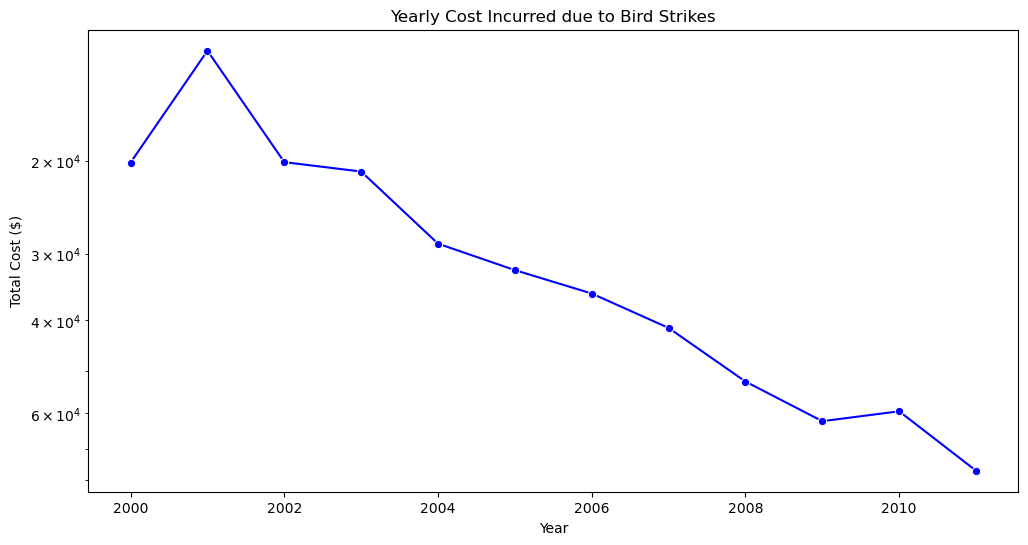

In [112]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Cost: Total $', data=bds_df, estimator=sum, errorbar=None, marker='o', color='blue')
plt.yscale('log')  # Using a logarithmic scale
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.show()

When do most bird strikes occur?

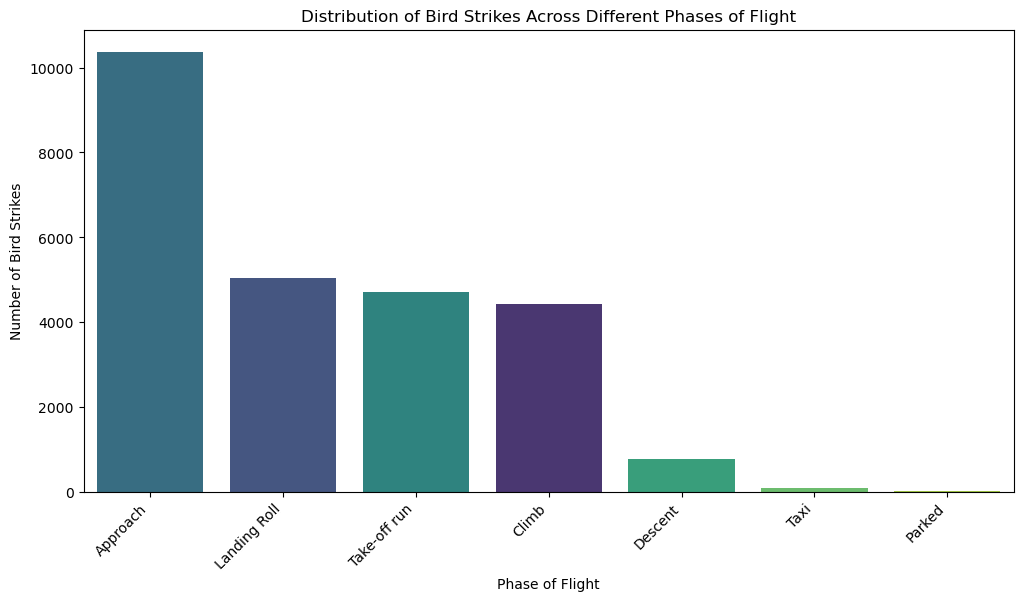

In [117]:
plt.figure(figsize=(12, 6))
sns.countplot(x='When: Phase of flight', hue='When: Phase of flight', data=bds_df, 
              order=bds_df['When: Phase of flight'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Bird Strikes Across Different Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

Altitude of aeroplanes at the time of strike

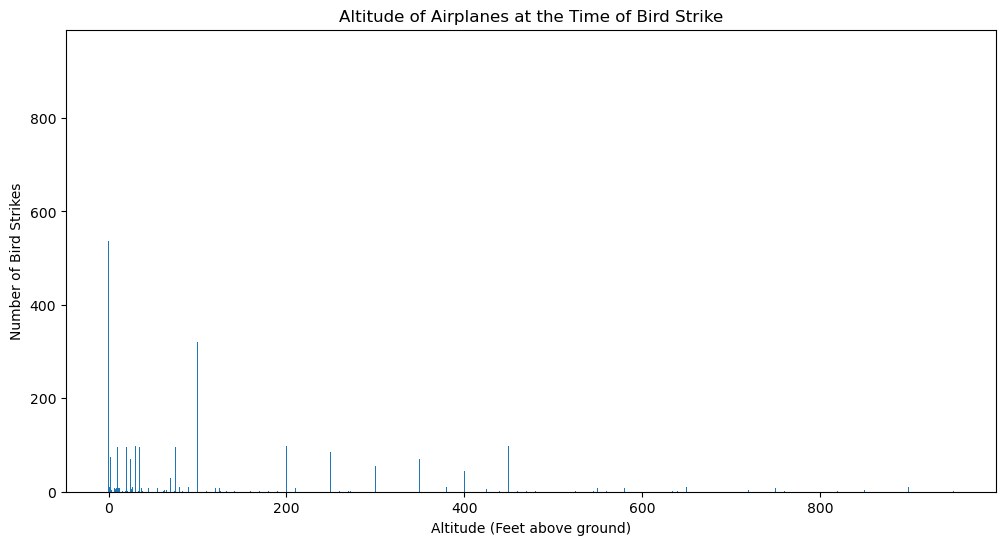

In [123]:
bds_df['Feet above ground'] = pd.to_numeric(bds_df['Feet above ground'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.bar(bds_df['Feet above ground'], bds_df['Wildlife: Number Struck Actual'])
plt.title('Altitude of Airplanes at the Time of Bird Strike')
plt.xlabel('Altitude (Feet above ground)')
plt.ylabel('Number of Bird Strikes')
plt.show()

Phase of flight at the time of the strike

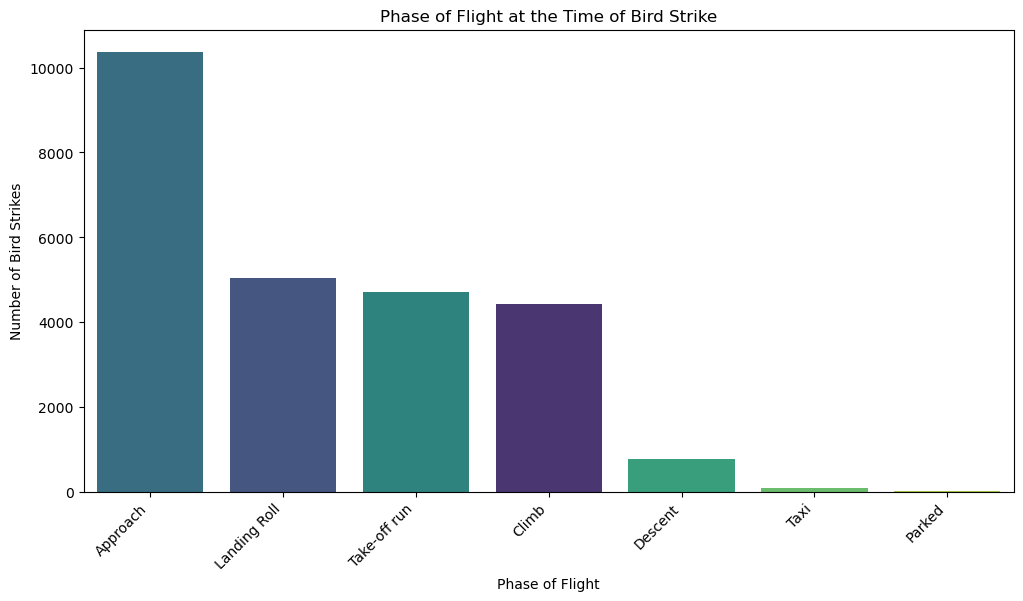

In [128]:
plt.figure(figsize=(12, 6))
sns.countplot(x='When: Phase of flight', hue='When: Phase of flight', data=bds_df, order=bds_df['When: Phase of flight'].value_counts().index, palette='viridis', legend=False)
plt.title('Phase of Flight at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()


Average Altitude of the aeroplanes in different phases at the time of strike

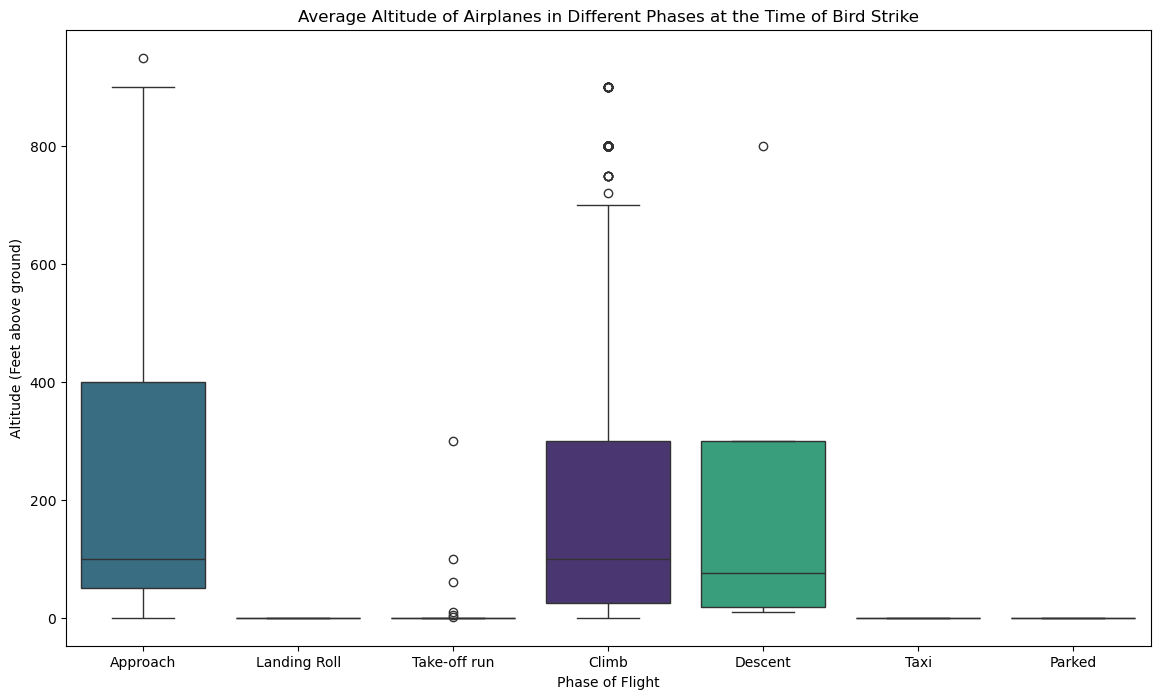

In [135]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='When: Phase of flight', y='Feet above ground', data=bds_df, 
            order=bds_df['When: Phase of flight'].value_counts().index, 
            palette='viridis', hue='When: Phase of flight', legend=False)

plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Altitude (Feet above ground)')

plt.show()


Effect of Bird Strikes & Impact on Flight

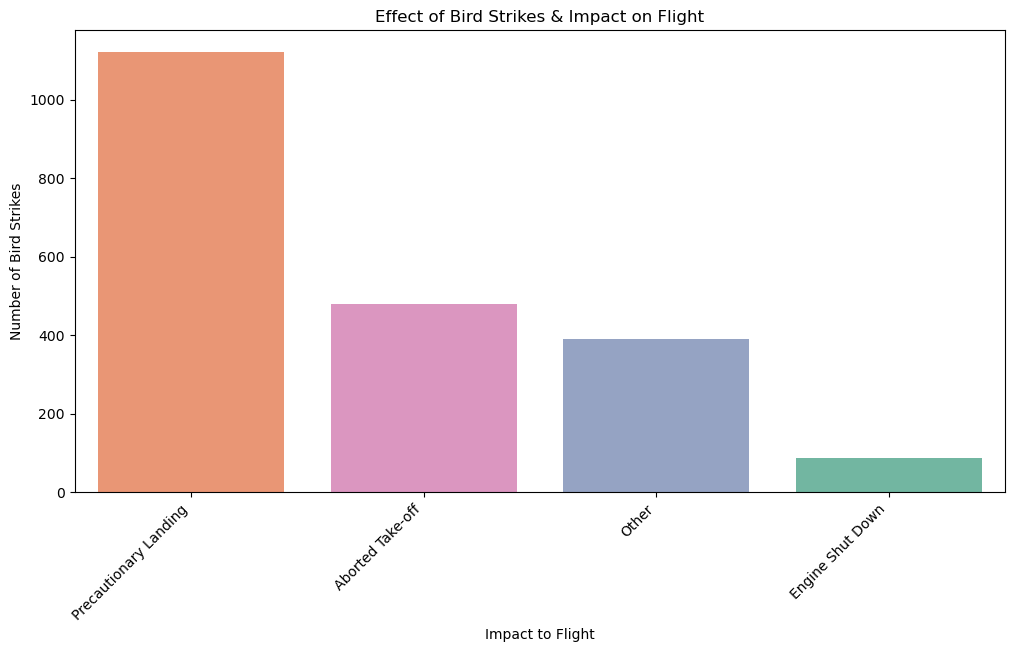

In [138]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', data=bds_df, 
              order=bds_df['Effect: Impact to flight'].value_counts().index, 
              palette='Set2', hue='Effect: Impact to flight', legend=False)

plt.title('Effect of Bird Strikes & Impact on Flight')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Effect of Strike at Different Altitude

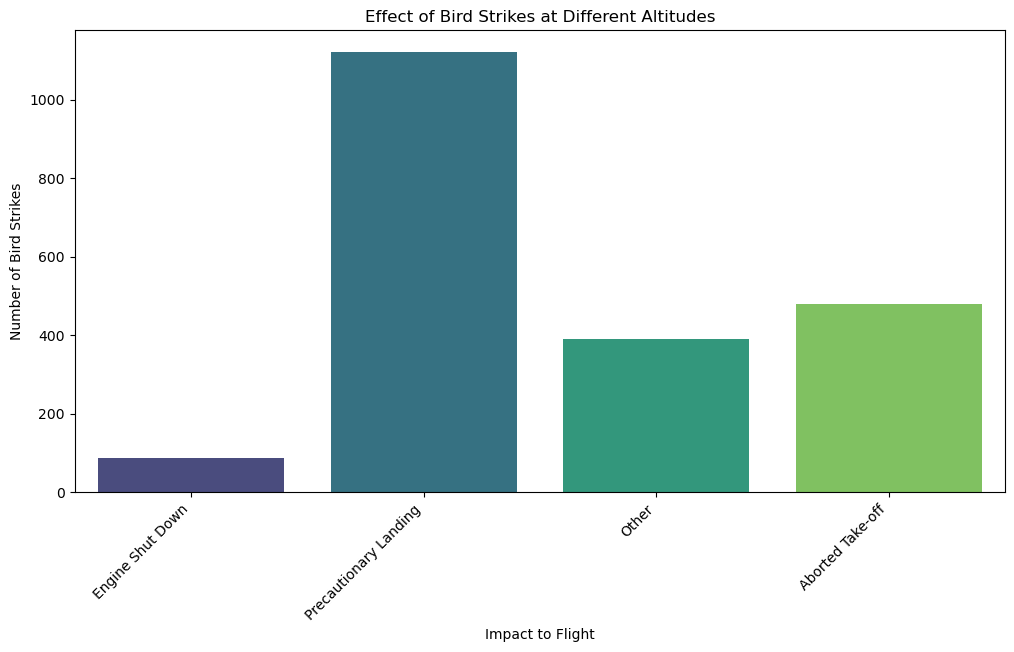

In [143]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', data=bds_df, palette='viridis', hue='Effect: Impact to flight', legend=False)
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

Were Pilots Informed? & Prior Warning and Effect of Strike Relation

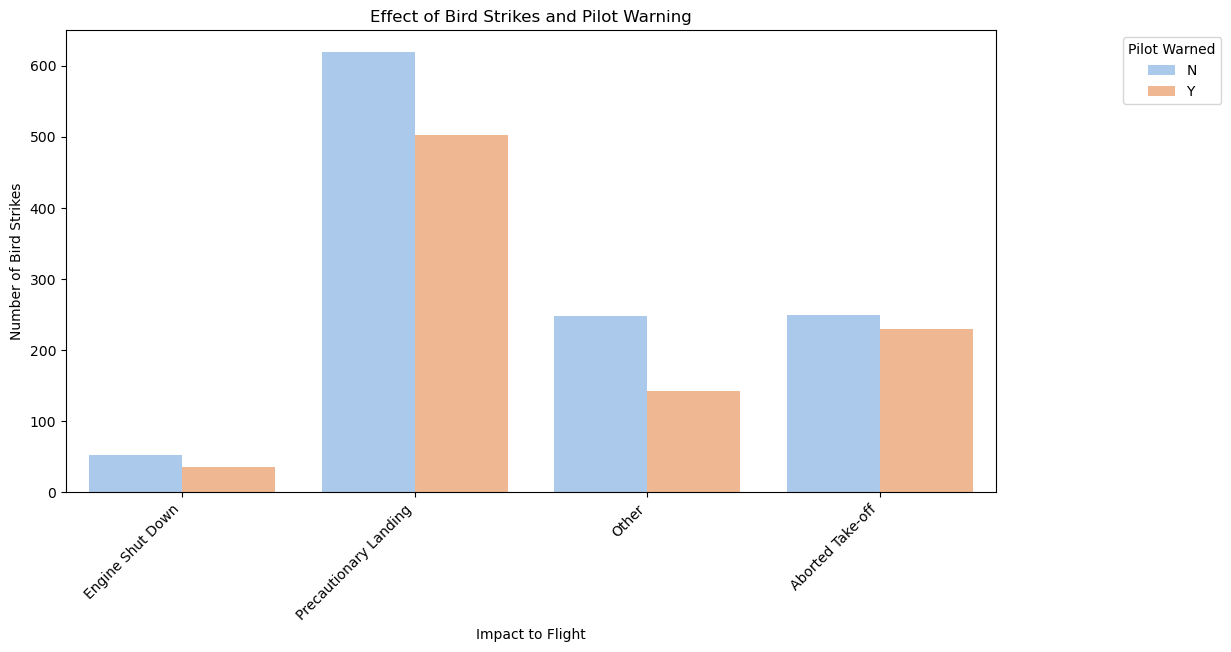

In [146]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', hue='Pilot warned of birds or wildlife?', data=bds_df, palette='pastel')
plt.title('Effect of Bird Strikes and Pilot Warning')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Pilot Warned', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()
